In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import numpy as np
from parmed.topologyobjects import DihedralType
from simtk import unit
from torsionfit.toy_model import ToyModel
import torsionfit.sqlite_plus as db
from matplotlib.backends.backend_pdf import PdfPages

Generate toy model that allows negative Ks and eliminates phase angles (doesn't sample phase angle. Sets them to 0
and uses sign of K to determine phase angle)

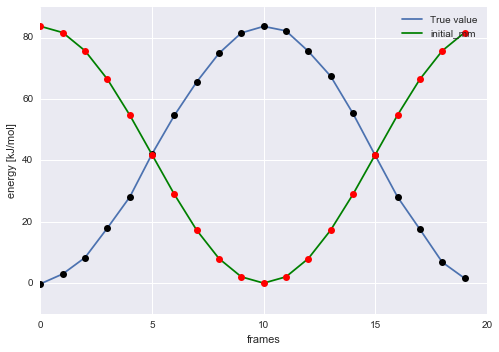

In [2]:
toy = ToyModel(true_value=DihedralType(10, 2, 180, 1, 1), initial_value=DihedralType(10, 2, 0, 1, 1), n_increments=10, negative_K=True)
plt.plot(toy.synthetic_energy, label='True value')
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')
plt.legend()

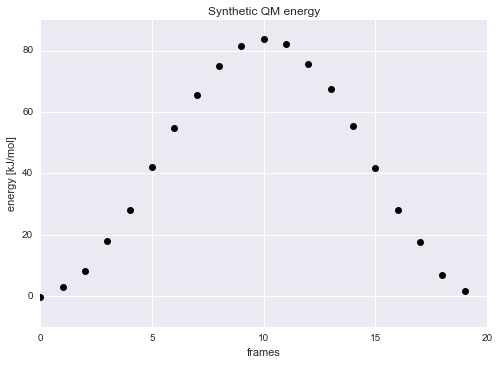

In [3]:
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.title('Synthetic QM energy')
plt.savefig('toy_QM_energy.pdf')

In [4]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='neg_K_0_phase.sqlite')
sampler.sample(iter=1000)

 [-----------------100%-----------------] 1000 of 1000 complete in 23.1 sec

In [6]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)
print toy.model.pymc_parameters['CG331_CG321_CG321_CG331_2_K'].value

true value
<DihedralTypes [<DihedralType; phi_k=10.000, per=2, phase=180.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralType; phi_k=10.000, per=2, phase=0.000,  scee=1.000, scnb=1.000>
-10.0003378134


With continuous phase proposals torsionfit gives a good fit. 

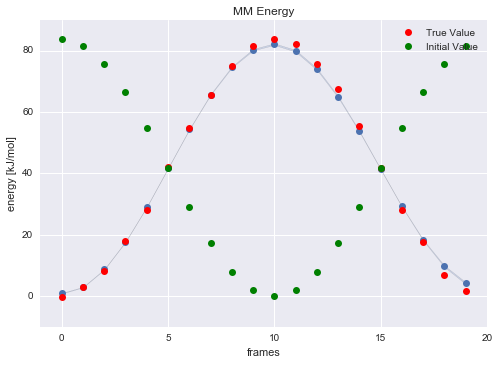

In [7]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, 'o', color='r', label='True Value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, 'o', color='g', label='Initial Value')
plt.legend()
plt.savefig('toy_mm_energy_neg_K.pdf')

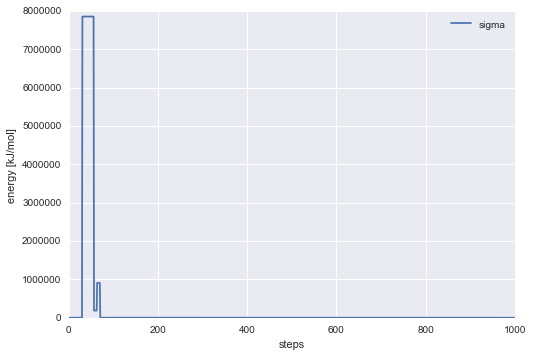

In [8]:
plt.plot(np.exp(sampler.trace('sigma')[:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_neg_K.pdf')

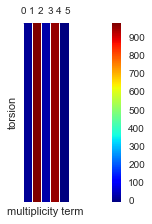

In [9]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0, 'random.png')
plt.savefig('multiplicity_neg_K.pdf')

From the traces of each parameters, you can see how the phase slowly moves to 180 as multiplicity 1 truns on and 2 turns off 

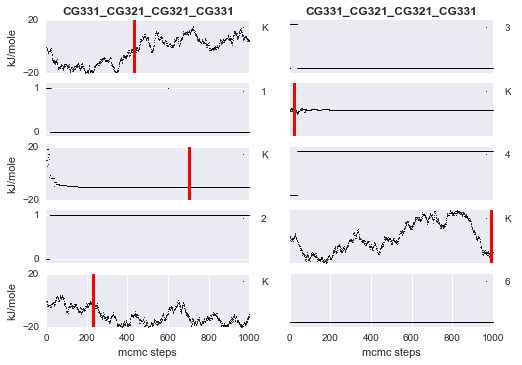

In [11]:
plots.trace_no_phase('CG331_CG321_CG321_CG331', sampler, markersize=2.0)

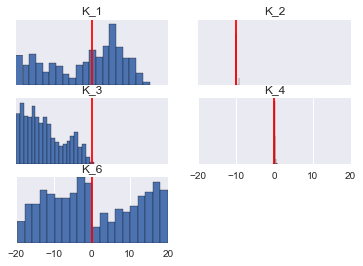

In [47]:
# Plot histograms of Force Constants
fig = plt.figure()
axes_k = plt.subplot(3, 2, 1)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_1_K')[100:], bins=20)
plt.axvline(0, color='r', label='True Value')
plt.title('K_1')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])

axes_k = plt.subplot(3, 2, 2)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_2_K')[100:])
plt.axvline(-10, color='r', label='True Value')
plt.title('K_2')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])

axes_k = plt.subplot(3, 2, 3)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_3_K')[100:], bins=20)
plt.axvline(0, color='r', label='True Value')
plt.title('K_3')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])

axes_k = plt.subplot(3, 2, 4)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_4_K')[100:], bins=20)
plt.axvline(0, color='r', label='True Value')
plt.title('K_4')
plt.yticks([])
plt.xticks([-20, -10, 0, 10, 20])
plt.xlim(-20, 20)

axes_k = plt.subplot(3, 2, 5)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_6_K')[100:], bins=20)
plt.axvline(0, color='r', label='True Value')
plt.title('K_6')
plt.xticks([-20, -10, 0, 10, 20])
plt.xlim(-20, 20)
plt.yticks([])

fig.savefig('ForceK_hist.pdf')

Test this approach with a more complicated torsion. Randomize True and initial value

In [52]:
toy = ToyModel(n_increments=10, negative_K=True)

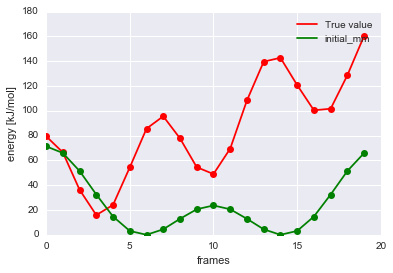

In [53]:
plt.plot(toy.synthetic_energy, color='r', label='True value')
plt.plot(toy.synthetic_energy, 'o', color='r')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'o', color='g')
plt.legend()

In [54]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)

true value
<DihedralTypes [<DihedralType; phi_k=8.163, per=6, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=1.431, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=11.442, per=1, phase=180.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralTypes [<DihedralType; phi_k=5.701, per=2, phase=0.000,  scee=1.000, scnb=1.000>, <DihedralType; phi_k=5.305, per=4, phase=180.000,  scee=1.000, scnb=1.000>]>


In [57]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='randomized.sqlit')
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 234.0 sec

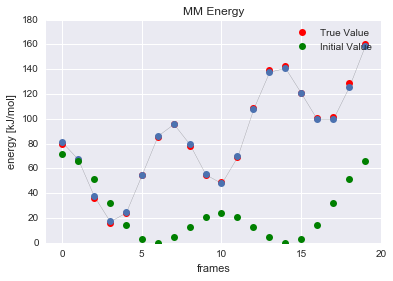

In [58]:
plt.plot(toy.synthetic_energy, 'o', color='r', label='True Value')
seaborn.tsplot(sampler.trace('mm_energy')[:][:,:40], interpolate=False)
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, 'o', color='g', label='Initial Value')
plt.legend()
plt.savefig('toy_mm_energy_neg_K_randomized.pdf')

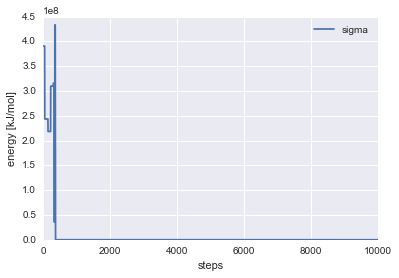

In [59]:
plt.plot(np.exp(sampler.trace('sigma')[:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_neg_K_randomized.pdf')

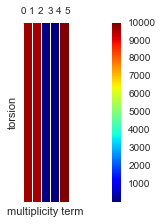

In [60]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0, 'random.png')
plt.savefig('multiplicity_randomized.pdf')

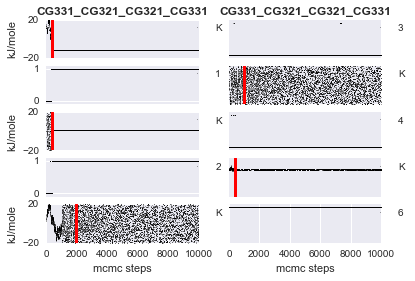

In [73]:
plots.trace_no_phase('CG331_CG321_CG321_CG331', sampler, markersize=1.0)

In [79]:
import pymbar
def trace_no_phase(name, db, markersize, statistics=False, multiplicity_traces=False):
    """
    Generate trace plot for all parameters of a given torsion

    :param name: str. name of torsion parameter A_B_C_D where A, B, C, and D are atom types.
    :param db: pymc.database (can also use pymc.sampler)
    :param markersize: int.
    :param statistics: dict that maps parameters to statistics from pymbar.timeseries.detectEquilibrium. Default: False
    :param multiplicity_traces: dict that maps multiplicity term to (0,1) trace. Default is False.
    """

    if not multiplicity_traces:
        multiplicity_traces = plots.get_multiplicity_traces(torsion_parameters=name, db=db)

    pp = PdfPages('%s_traces.pdf' % name)
    fig = plt.figure()

    axes_k = plt.subplot(5, 2, 1)
    plt.plot(db.trace(name + '_' + str(1) + '_K')[:], 'k.', markersize=markersize, label='K')
    plt.title(name, fontweight='bold')
    if statistics:
        axes_k.axvline(statistics[name + '_' + '1' + '_K'][0], color='red', lw=1)
    else:
        axes_k.axvline(pymbar.timeseries.detectEquilibration(db.trace(name + '_' + str(1) + '_K')[:])[0], color='red',
                       lw=1)
    plt.ylim(-20, 20)
    plt.ylabel('kJ/mole')
    plt.xticks([])
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.yticks([-20, 20])

    axes_n = plt.subplot(5, 2, 3)
    plt.plot(multiplicity_traces[name + '_' + str(1)], 'k.', markersize=markersize, label='1')
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.ylim(-0.1, 1.1)
    plt.yticks([0, 1])
    plt.xticks([])

    axes_k = plt.subplot(5, 2, 5)
    plt.plot(db.trace(name + '_' + str(2) + '_K')[:], 'k.', markersize=markersize, label='K')
    if statistics:
        axes_k.axvline(statistics[name + '_' + '2' + '_K'][0], color='red', lw=1)
    else:
        axes_k.axvline(pymbar.timeseries.detectEquilibration(db.trace(name + '_' + str(2) + '_K')[:])[0], color='red',
                       lw=1)
    plt.ylim(-20, 20)
    plt.ylabel('kJ/mole')
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.xticks([])
    plt.yticks([-20, 20])

    axes_n = plt.subplot(5, 2, 7)
    plt.plot(multiplicity_traces[name + '_' + str(2)], 'k.', markersize=markersize, label='2')
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.ylim(-0.1, 1.1)
    plt.yticks([0, 1])
    plt.xticks([])

    axes_k = plt.subplot(5, 2, 9)
    plt.plot(db.trace(name + '_' + str(3) + '_K')[:], 'k.', markersize=markersize, label='K')
    if statistics:
        axes_k.axvline(statistics[name + '_' + '3' + '_K'][0], color='red', lw=1)
    else:
        axes_k.axvline(pymbar.timeseries.detectEquilibration(db.trace(name + '_' + str(3) + '_K')[:])[0], color='red',
                       lw=1)
    plt.ylim(-20, 20)
    plt.ylabel('kJ/mole')
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.yticks([-20, 20])
    plt.xlabel('mcmc steps')


    axes_n = plt.subplot(5, 2, 2)
    plt.title(name, fontweight='bold')
    plt.plot(multiplicity_traces[name + '_' + str(3)], 'k.', markersize=markersize, label='3')
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.ylim(-0.1, 1.1)
    plt.yticks([])
    plt.xticks([])

    axes_k = plt.subplot(5, 2, 4)
    plt.plot(db.trace(name + '_' + str(4) + '_K')[:], 'k.', markersize=markersize, label='K')
    if statistics:
        axes_k.axvline(statistics[name + '_' + '4' + '_K'][0], color='red', lw=1)
    else:
        axes_k.axvline(pymbar.timeseries.detectEquilibration(db.trace(name + '_' + str(4) + '_K')[:])[0], color='red',
                       lw=1)
    plt.ylim(-20, 20)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.xticks([])
    plt.yticks([])

    axes_n = plt.subplot(5, 2, 6)
    plt.plot(multiplicity_traces[name + '_' + str(4)], 'k.', markersize=markersize, label='4')
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.ylim(-0.1, 1.1)
    plt.yticks([])
    plt.xticks([])

    axes_k = plt.subplot(5, 2, 8)
    plt.plot(db.trace(name + '_' + str(6) + '_K')[:], 'k.', markersize=markersize, label='K')
    if statistics:
        axes_k.axvline(statistics[name + '_' + '6' + '_K'][0], color='red', lw=1)
    else:
        axes_k.axvline(pymbar.timeseries.detectEquilibration(db.trace(name + '_' + str(6) + '_K')[:])[0], color='red',
                       lw=1)
    plt.ylim(-20, 20)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.yticks([])
    plt.xticks([])

    axes_n = plt.subplot(5, 2, 10)
    plt.plot(multiplicity_traces[name + '_' + str(6)], 'k.', markersize=markersize, label='6')
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    plt.ylim(-0.1, 1.1)
    plt.yticks([])
    plt.xlabel('mcmc steps')

    fig.savefig('%s_traces.pdf' % name)
    pp.savefig(fig, dpi=80)
    pp.close()

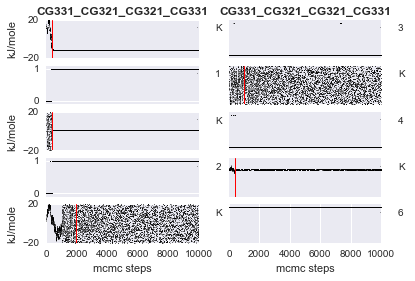

In [80]:
trace_no_phase('CG331_CG321_CG321_CG331', sampler, markersize=1.0)

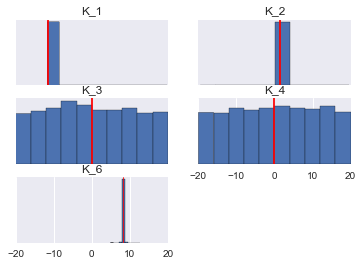

In [72]:
# Plot histograms of Force Constants
fig = plt.figure()
axes_k = plt.subplot(3, 2, 1)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_1_K')[:])
plt.axvline(-11.442, color='r', label='True Value')
plt.title('K_1')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])

axes_k = plt.subplot(3, 2, 2)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_2_K')[:])
plt.axvline(1.431, color='r', label='True Value')
plt.title('K_2')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])

axes_k = plt.subplot(3, 2, 3)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_3_K')[:])
plt.axvline(0, color='r', label='True Value')
plt.title('K_3')
plt.xticks([])
plt.xlim(-20, 20)
plt.yticks([])

axes_k = plt.subplot(3, 2, 4)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_4_K')[:])
plt.axvline(0, color='r', label='True Value')
plt.title('K_4')
plt.yticks([])
plt.xticks([-20, -10, 0, 10, 20])
plt.xlim(-20, 20)

axes_k = plt.subplot(3, 2, 5)
plt.hist(sampler.trace('CG331_CG321_CG321_CG331_6_K')[:])
plt.axvline(8.163, color='r', label='True Value', linewidth=0.8)
plt.title('K_6')
plt.xticks([-20, -10, 0, 10, 20])
plt.xlim(-20, 20)
plt.yticks([])

fig.savefig('ForceK_hist_randomized.pdf')